In [357]:
import pandas as pd
data = pd.read_csv('/content/Housing.csv')

In [358]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [359]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [360]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [361]:
data.shape

(545, 13)

In [362]:
data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [363]:
data['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [364]:
binary_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in binary_columns:
  data[col] = data[col].map({'yes' : 1, 'no' : 0})

print(data.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [365]:
furnishing_dummies = pd.get_dummies(data['furnishingstatus'],dtype=int,prefix='furnishing')
data = pd.concat([data,furnishing_dummies],axis=1)
data.drop('furnishingstatus',axis=1,inplace = True)

print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishing_furnished  furnishing_semi-furnished  furnishing_unfurnished  
0                     1                          0                       0  
1   

In [366]:
data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [367]:
data.to_csv("Modified Dataset",index=False)

In [368]:
correlation = data.corr()

<Axes: >

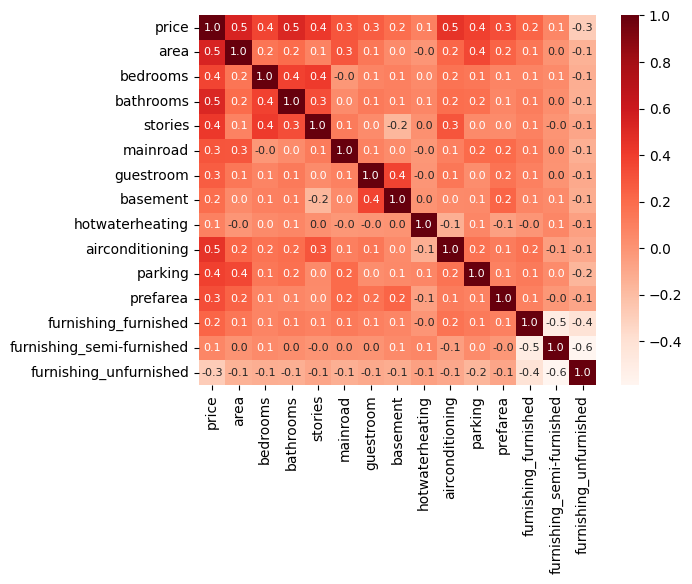

In [369]:
import seaborn as sns

sns.heatmap(correlation,cbar = True,annot=True,cmap='Reds',fmt='.1f',annot_kws={'size':8})

In [370]:
X = data.drop(['price'],axis=1)

In [371]:
Y = data['price']

In [372]:
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  \
0                  0                1        2     

In [373]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [374]:
print(X.shape,X_train.shape,X_test.shape)

(545, 14) (436, 14) (109, 14)


In [375]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth = 3)

In [376]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [377]:
Training_data_Prediction = model.predict(X_train)

In [378]:
print(Training_data_Prediction)

[ 7497913.5  6400063.   3963944.2  3480027.5  3204707.   4346701.
  3033567.   3074578.5  2516534.   3871539.2  3711941.2  3364695.8
  4187610.5  3782565.8  3882235.8  5832822.   2237441.   5941274.
  3436131.   7117066.5  4217875.   3440650.8  4862629.   5835894.5
  6131912.   3204707.   2447612.5  3644617.5  5132627.5  3372442.5
  4464203.   2456049.   3790996.5  5407358.5  4218965.   3203848.
  3378408.5  7959544.   4741533.5  7105547.   4953818.   4859746.5
  3739833.5  4048653.2  3751355.   3126145.5  5790783.5  8891281.
  4104165.5  7745901.5  3434230.8  3644286.   5338290.   3721421.8
  4882923.5  5900601.   4020360.   3837076.2  7323164.5  5809474.5
  5146663.5  3068363.   5134882.   7616988.5  4748684.5  8484276.
  8953325.   3102163.   6849845.5  4509363.5  4723958.   3829355.8
  4214622.5  6720806.   4955553.   5268703.5  4483125.   7066998.
  3245803.   3183132.   2942247.2 10866810.   6033122.   7039088.
  4137505.2  4455350.5  8319449.5  6681735.5  4429008.   3300580.5
 1

In [379]:
from sklearn import metrics
score1 = metrics.r2_score(Y_train,Training_data_Prediction)
score2 = metrics.mean_absolute_error(Y_train,Training_data_Prediction)

print("R2 Score : ",score1)
print("Mean Absolute Error :",score2)

R2 Score :  0.9336144924163818
Mean Absolute Error : 348796.90625


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

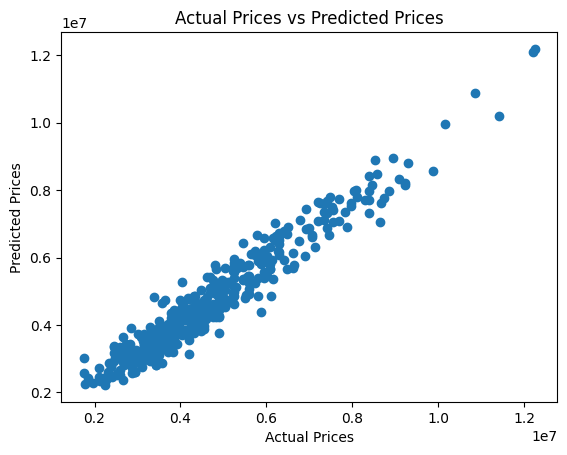

In [391]:
plt.scatter(Y_train,Training_data_Prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

In [381]:
Test_data_Prediction = model.predict(X_test)

In [382]:
from sklearn import metrics
score1 = metrics.r2_score(Y_test,Test_data_Prediction)
score2 = metrics.mean_absolute_error(Y_test,Test_data_Prediction)

print("R2 Score : ",score1)
print("Mean Absolute Error :",score2)

R2 Score :  0.6449024677276611
Mean Absolute Error : 984732.6875


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

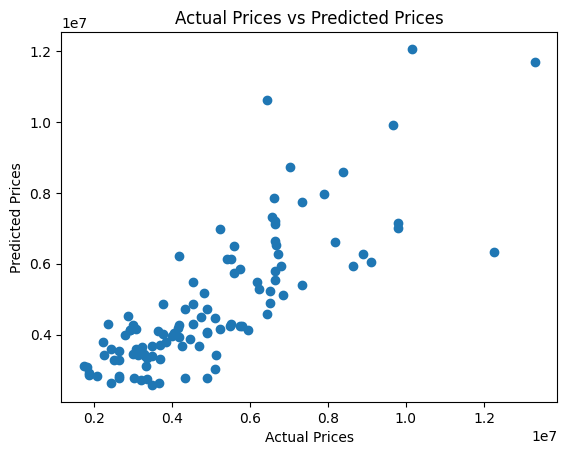

In [392]:
plt.scatter(Y_test,Test_data_Prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

In [389]:
import numpy as np

input = (6000,4,2,4,1,0,0,0,1,0,0,0,0,1)
input_array = np.asarray(input)
reshaped_data = input_array.reshape(1,-1)

predicted_price = model.predict(reshaped_data)

print("Price of House is :",predicted_price)

Price of House is : [6479899.5]
